# 성능평가 - 회귀 모델

# 1. 회귀 모델 성능 평가

### 1) 데이터 준비

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

In [3]:
# 데이터 이해
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [4]:
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [5]:
data.info()  # solar.R 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [6]:
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [7]:
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


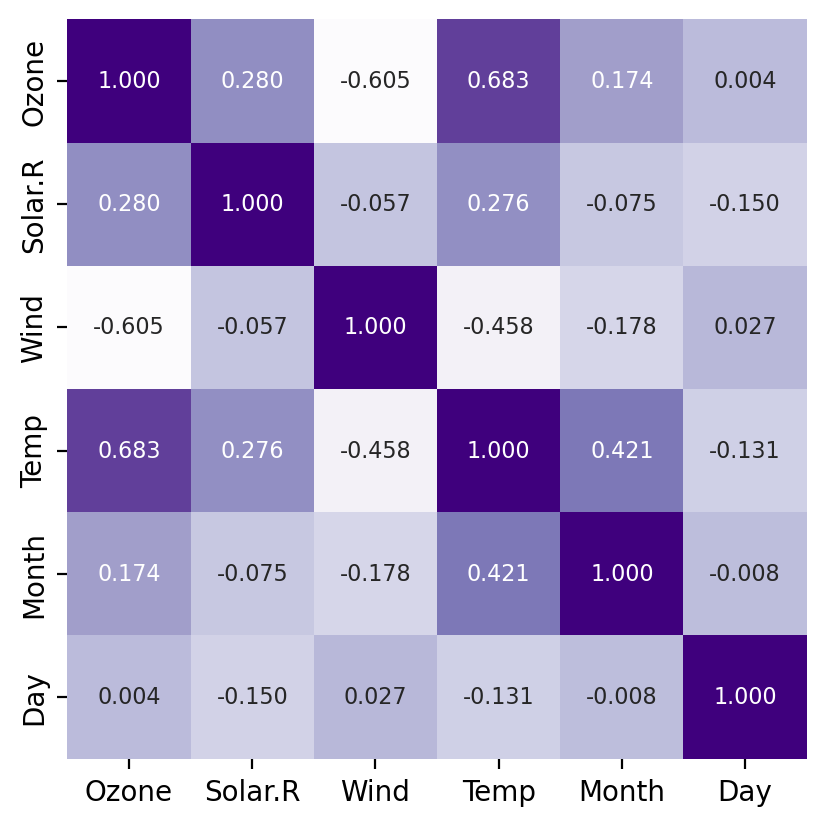

In [8]:
# 히트맵 시각화
sns.heatmap(data.corr(),
           annot=True,
           cmap='Purples',
           cbar=False,
           square=True,
           fmt='.3f',
           annot_kws={'size': 8})
plt.show()

In [9]:
# 결측치 확인
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [11]:
# 직전 값으로 결측치 채우기
data.fillna(method='ffill', inplace=True)

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [12]:
# 분석에 필요없는 변수 제거

drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()


,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


In [13]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [14]:
# 학습용, 평가용 데이터 분리

# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  

### 2) 모델링
- 알고리즘: LinearRegression

In [15]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression

In [16]:
# 2단계: 선언하기
model = LinearRegression()

In [17]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [18]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

### 3) 회귀 성능 평가

- MAE, MSE, RMSE, MAPE, R2-score
- MAE, MSE, RMSE, MAPE는 작을수록 좋음(error이기 때문에)
- R2-score는 1에 가까울수록 좋음
- SSE, MSE, <span style="color:indianred">**RMSE, MAE**</span> 중 고객에게 설명할 때 사용할 수 있는 성능 값? 
    - RMSE, MAE => 수업에선 편의를 위해 MAE와 R2-score만 사용

**1) MAE(Mean Absolute Error)**


$$\large MAE=\frac{1}{n}\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|$$

In [19]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_error

# 성능 평가
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 13.976843190385711


**2) MSE(Mean Squared Error)**

$$\large MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2$$

In [20]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 341.678874066819


**3) RMSE(Root Mean Squared Error)**


$$\large RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}$$

In [21]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

RMSE: 18.484557718993955
RMSE: 18.484557718993955


**4) MAPE(Mean Absolute Percentage Error)**

$$\large MAPE=\frac{1}{n}\sum_{i=1}^{n}\left |\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right |$$

In [22]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_percentage_error

# 성능 평가
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.47185976988482603


**5) R2-Score**

$$\large R^2=1-\frac{SSE}{SST}=1-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^2}$$

In [23]:
# 모듈 불러오기
from sklearn.metrics import r2_score

# 성능 평가
print('R2:', r2_score(y_test, y_pred))

R2: 0.5744131358040061


- 다음과 같이 score()메소드를 사용해 R2를 확인할 수 있습니다.

In [24]:
model.score(x_test, y_test)   # 파라미터 값 조심!!! 

0.5744131358040061

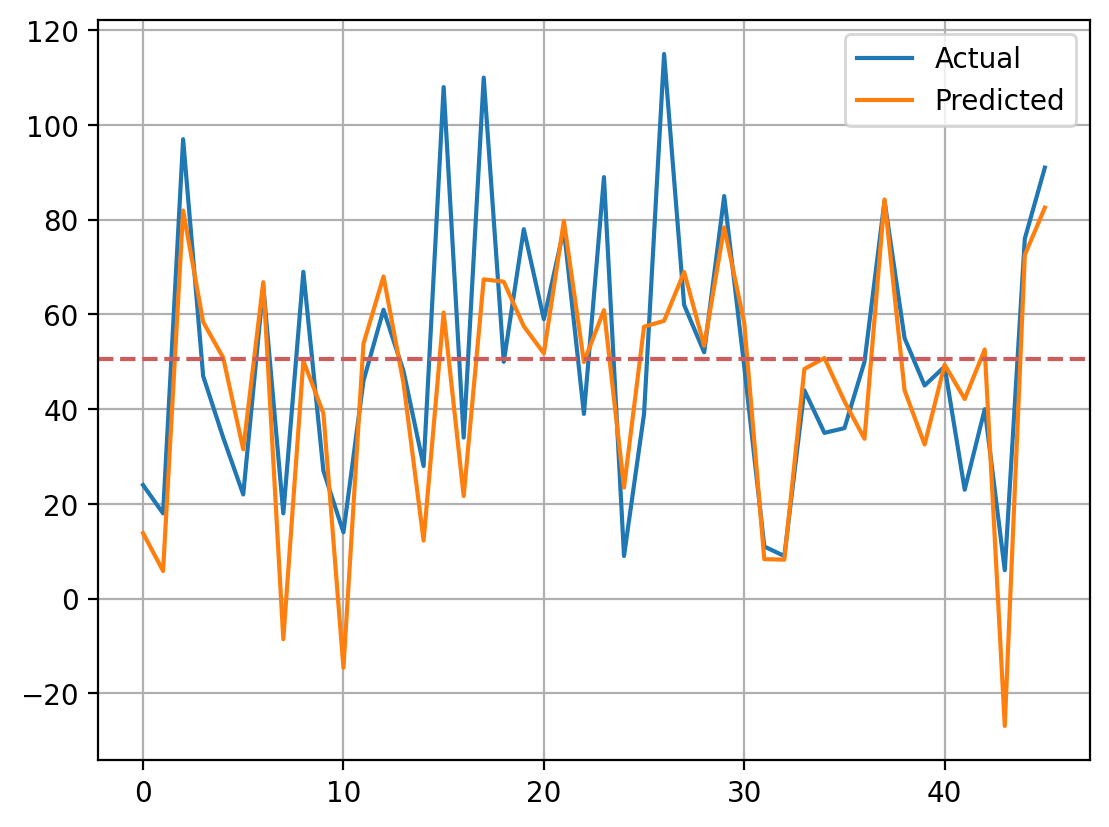

In [30]:
## 실제값과 예측값 시각화
mean_ = y_test.mean()

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.axhline(mean_, color='indianred', linestyle='--')
plt.grid()
plt.legend()
plt.show()

$ $

### 4) 연습

In [25]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

In [26]:
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [28]:
data.corr()

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


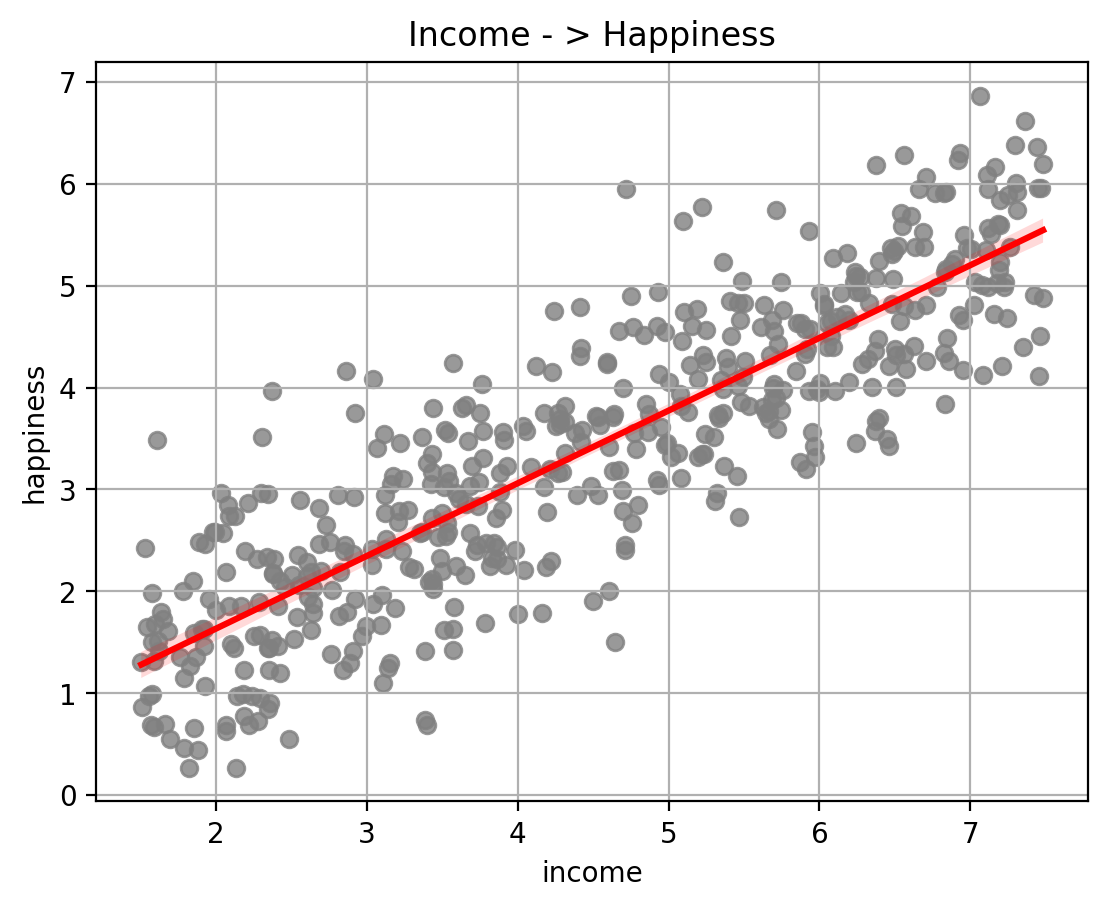

In [29]:
# 산점도 + 회귀선 시각화
sns.regplot(x='income', y='happiness', data=data,
            line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})
plt.title('Income - > Happiness')
plt.grid()
plt.show()

In [31]:
# target 설정
target = 'happiness'

# x,y설정
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [32]:
# 학습용 평가용 데이터 분리
from sklearn.model_selection import train_test_split

# 7:3 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=1)


In [33]:
# 모델링

# 1: 불러오기
from sklearn.linear_model import LinearRegression

In [34]:
# 2: 선언하기
model = LinearRegression()

In [35]:
# 3: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [36]:
# 4: 예측하기
y_pred = model.predict(x_test)

In [ ]:
# # 회귀 성능 평가
# MAE, MSE, RMSE, MAPE, R2-score

In [37]:
# 모듈 불러오기
from sklearn.metrics import *

# 성능 평가
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred)**0.5)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MAE: 0.5588237111283767
MSE: 0.49834125870443396
RMSE: 0.705932899576464
RMSE: 0.705932899576464
MAPE: 0.2534283507792003
R2: 0.7545536758581621


In [38]:
model.score(x_test, y_test) 

0.7545536758581621